In [7]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def box_count(grayscale_img, k):
    img_sum = np.add.reduceat(
    np.add.reduceat(grayscale_img, np.arange(0, grayscale_img.shape[0], k), axis=0),
                                    np.arange(0, grayscale_img.shape[1], k), axis=1)
            
    return len(np.where((img_sum > 0) & (img_sum < k*k*255))[0])

In [16]:
img = cv2.imread(os.getcwd() + '\\..\\final.jpg',0)
img[img != 255] = 0

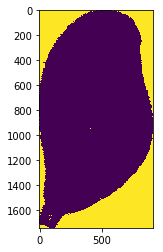

In [17]:
plt.imshow(img)

In [110]:
min_dim = min(img.shape)
n = int(np.floor(np.log(min_dim)/np.log(2)))

sizes = 2**np.arange(n, 1, -1)
counts = []
for size in sizes:
    counts.append(box_count(img,size))

In [ ]:
coeffs = np.polyfit(np.log(sizes), np.log(counts), 1)
print(-coeffs[0])